In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy import integrate
from sauron_colormap import sauron
import pandas as pd
import math

In [2]:
def smooth_mask(cube,beam,chans2look,rmsfac=3):
    mask=ndimage.uniform_filter(cube,size=[4,beam*1.5,beam*1.5])
    quart=np.floor(np.array(cube.shape)/8.).astype(np.int)
    half=np.floor(np.array(cube.shape)/2.).astype(np.int)
    #print(half, quart)
    rms=np.nanstd(mask[chans2look[0]:chans2look[1],half[1]-quart[1]:half[1]+quart[1],half[2]-quart[2]:half[2]+quart[2]])
    return mask>rms*rmsfac

In [3]:
def spectrum(cube):
    spec=np.nansum(np.nansum(cube,axis=1),axis=1)
    return spec

In [4]:
def mom_0(cube):
    m0=(cube).sum(axis=0)
    return m0

In [60]:
test=fits.open('Documents/CARS/HE13531917/HE13531917_clean_hco.image.fits')
casa=fits.open('Documents/CARS/HE13531917/HE13531917_clean_co_new.image.fits')

In [61]:
#casaspec=casa[0].data

In [62]:
testdata=test[0].data
testhdr=test[0].header
testbeamtab=test[1].data
testdatan=np.squeeze(testdata)
testdatann=np.nan_to_num(testdatan)
COdata=casa[0].data
COhdr=casa[0].header
CObeamtab=casa[1].data
COdatan=np.squeeze(COdata)
COdatann=np.nan_to_num(COdatan)

In [63]:
bmajas=np.median(testbeamtab['BMAJ'])
bminas=np.median(testbeamtab['BMIN'])
bmaj=bmajas/3600
bmin=bminas/3600
xcellsize=testhdr['CDELT1']
maskt=smooth_mask(testdatann,bmaj/np.abs(xcellsize),[1,10],rmsfac=1.5)
CObmajas=np.median(CObeamtab['BMAJ'])
CObminas=np.median(CObeamtab['BMIN'])
CObmaj=CObmajas/3600
CObmin=CObminas/3600
COxcellsize=COhdr['CDELT1']
COmask=smooth_mask(COdatann,CObmaj/np.abs(COxcellsize),[1,10],rmsfac=5)

In [64]:
inv_beam=math.pi*(bmaj/np.abs(xcellsize))*(bmin/np.abs(xcellsize))/(4*math.log(2))
beam=inv_beam**(-1)
print(beam)

0.04198186913920812


In [65]:
COmaskdata=COdatann*COmask
mom=mom_0(COmaskdata)

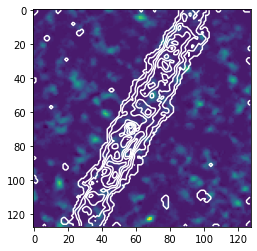

In [66]:
moment0=mom_0(testdatann*maskt)
im=plt.imshow(moment0)
m0=plt.contour(mom,colors='white')
plt.show()

In [72]:
maskdata=testdatann*maskt*beam

In [73]:
spec=spectrum(maskdata)

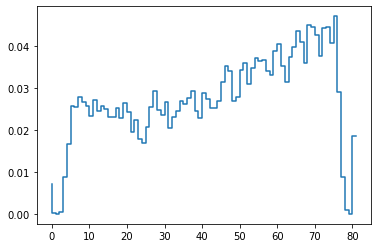

In [74]:
plt.step(np.arange(spec.shape[0]),spec)
#plt.step(np.arange(casaspec.shape[0]),casaspec)